In [1]:
# imports
import numpy as np
import sys
sys.path.insert(0,"")

import warnings
warnings.filterwarnings('ignore')

In [3]:
from gym_graphenv.envs.GraphworldManhattan import GraphEnv

Read hubs successfully
Using remote db
[(42423774,), (42424025,), (42427769,), (42427863,), (42427968,), (42428174,), (42428863,), (42428980,), (42429342,), (42430253,), (42430333,), (42430361,), (42430375,), (42432856,), (42432889,), (42432985,), (42433058,), (42433066,), (42433422,), (42435684,), (42436486,), (42437644,), (42438809,), (42440743,), (42440798,), (42442415,), (42442475,), (42442937,), (42443534,), (42443674,), (42444457,), (42445018,), (42445357,), (42445392,), (42445867,), (42445916,), (42446959,), (42446977,), (42447105,), (42447132,), (42449029,), (42450025,), (42450468,), (42450820,), (42453934,), (42457401,), (205024444,), (248708582,), (370888100,), (370913758,), (370924957,), (371188750,), (371239958,), (561035358,), (561042199,), (595295501,), (595314119,), (595352904,), (596775930,), (1061531596,), (1692433919,), (1825841704,), (1919595922,), (3099327970,), (3099327976,), (3579432156,), (4145735059,), (5779545445,), (7490266268,), (9177424868,)]


In [4]:
env=GraphEnv()

USE CONFIG True
Using remote db
Read hubs successfully
DB: getAvailableTrips() Execution time: 133.89544105529785 seconds
loaded 154112 trips
Initialized with 154112 taxi rides within two weeks


In [5]:
env.reset()

Started Reset() with config
Reset initialized pickup: 13
Reset initialized dropoff: 13
Reset initialized time: 2016-04-29 10:41:50


{'cost': array([ 5144,  8314,  4321,  4624,  3343,  2887,  3025,  2607,  1386,
         4532,  1889,   993,  2173,     0,  1475,  1105,  1592,  2254,
         2528,  2141,  1673,  2464,  1992,  2509,  3670,  4092,  5699,
         4413,  4889,  7331,  8520, 10170,  7710, 11383, 11065, 11055,
        13958, 12534, 13376, 14742, 14745, 15617, 16506, 10013,  8475,
         7723,  7564,  5108,  5636,  3965,  3778,  2831,  5439,  1707,
         6519,  5128,  4475,  4083,  1202,  6295,  1770,  2556,  3525,
         3312,  5617,  6429,  6905,   951,   797,   793]),
 'remaining_distance': array([10243, 16205,  8679,  9307,  6678,  5969,  5985,  5219,  3118,
         9256,  3780,  2020,  4499,     0,  2946,  2207,  2859,  4309,
         5015,  4240,  3506,  4926,  4139,  4978,  7343,  8189, 11582,
         8829,  9475, 15259, 18649, 19812, 14851, 22365, 22209, 22304,
        26936, 25223, 26785, 29444, 29446, 31190, 32997, 20222, 15544,
        14122, 13780, 10265, 10402,  7791,  7301,  5500,  7

Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


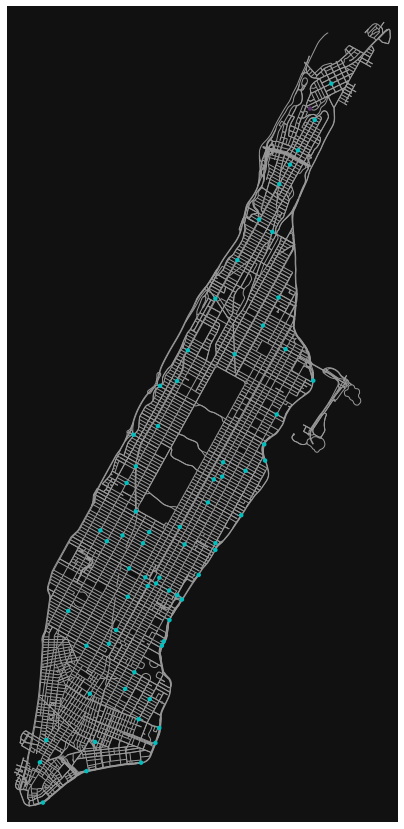

HIER IST RENDER FERTIG


In [6]:
env.render()

In [7]:
env.step(15)

action == book own 
13 -> 15 1105.85


({'cost': array([ 5673,  8484,  4588,  4795,  3514,  3416,  3295,  2821,  2234,
          5270,  2973,  1826,  3278,  1101,   370,     0,   633,  2080,
          2354,  1967,  1500,  1359,  1818,  2005,  2566,  3295,  4154,
          3308,  3785,  6231,  7419,  9070,  8537, 10283,  9964, 10795,
         12858, 12274, 14205, 13642, 13644, 14516, 15405,  9754,  8215,
          7464,  7304,  4935,  5376,  3792,  3605,  2658,  4339,   609,
          6689,  5298,  4646,  4254,  1372,  6465,  1940,  1455,  2425,
          2211,  4517,  5328,  5805,   777,   467,   312]),
  'remaining_distance': array([10772, 16375,  8945,  9477,  6848,  6498,  6255,  5433,  3965,
          9994,  4864,  2853,  5604,  1101,  1842,  1101,  1901,  4135,
          4842,  4066,  3333,  3822,  3964,  4474,  6238,  7392, 10037,
          7725,  8370, 14159, 17549, 18712, 15678, 21264, 21108, 22045,
         25835, 24963, 27614, 28343, 28346, 30089, 31896, 19962, 15285,
         13862, 13520, 10091, 10142,  7618,  7

action == wait 
2 -> 2 0.0
Shared:  []
Book owns:  [42447105, 42437644, 595295501, 42428174, 42443534, 371188750, 371239958, 561042199, 42447132, 42433058, 42450468, 42440743, 1825841704, 42433066, 42445867, 42445357, 42430253, 42428980, 42457401, 42427968, 595352904, 42445392, 42432856, 42445916, 42440798, 561035358, 42435684, 5779545445, 42450025, 42446959, 42427769, 42432889, 42430333, 42446977, 42450820, 42449029, 42436486, 42433422, 1919595922, 4145735059, 42430361, 42443674, 42438809, 7490266268, 370924957, 42429342, 370888100, 42430375, 42444457, 42453934, 42442415, 42442937, 205024444, 42428863, 595314119, 1061531596, 42427863, 42432985, 42445018, 42424025, 3579432156, 370913758, 42423774, 3099327970, 9177424868, 248708582, 3099327976, 42442475, 596775930, 1692433919]


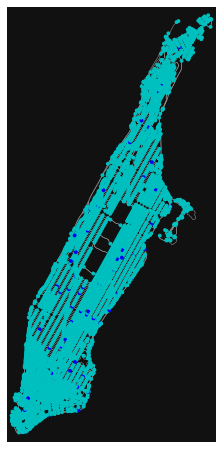

HIER IST RENDER FERTIG


In [24]:
env.step(2)
env.render()

In [7]:
def run_one_episode (env):
    env.reset()
    print("reset done")
    sum_reward = 0
    counter = 0
    while(counter<10):
        # visualize current situation
        env.render()

        # look in adjacency matrix for costs from the current position
        array = env.learn_graph.adjacency_matrix('cost')[env.position].astype(int)
        min = np.amin(array)
        array = np.where(array==min,50,array)

        # get minimal value in array
        #while(action==env.position):
        min_value = np.amin(array)
        print(min_value)
        # if multiple entries have the same value
        all_indices = np.where(array==min_value)
        print(f"Alle: {all_indices[0]}")
        action = np.random.choice(all_indices[0])
        print(action)
        # select random of all_indices
            #while(action==env.position):
            #    action = np.random.choice(all_indices[0])

        # select action and show it
        #action = env.action_space[dest_hub]
        print(f"Our destination hub is: {action}")
        state, reward, done, info = env.step(action)

        # add reward
        sum_reward+=reward
        counter+=1

        if done:
            print("DELIVERY DONE! sum_reward: ",sum_reward)
            break

        print("sum_reward: ",sum_reward)
        # print("sum_reward: ",sum_reward, " time: ",env.time, "deadline time: ", env.deadline, "pickup time: ", env.pickup_time)
    return sum_reward
print(run_one_episode(env))

Started Reset() with config
Reset initialized pickup: 13
Reset initialized dropoff: 13
Reset initialized time: 2016-04-29 10:41:50
reset done
HIER IST RENDER FERTIG
50
Alle: [13]
13
Our destination hub is: 13
action == wait 
13 -> 13 0.0
DELIVERED IN TIME AFTER 1 ACTIONS (#wait: 1, #share: 0, #book own: 0
DELIVERY DONE! sum_reward:  10000.0
10000.0
